In [11]:
# DataFrames and Math
import pandas as pd
import numpy as np
import tqdm
pd.options.display.max_columns = 100

# API management
import json
import base64
import requests
from getpass import getpass

# Plotting
import matplotlib.pyplot as plt

# Paths
import pathlib
data_path =  pathlib.Path().resolve().parent.parent/ "rn_home" / "data"
data_output_path =      data_path / "advan_data"
footfall_output_path =  data_path / "advan_data_footfall"
processed_output_path = data_path / "advan_data_processed"

# Define required functions

In [5]:
# Define a helper function to download advan data
def download_advan_data(url, partition, output_path):
    # Get Raja's access token
    access_token = getpass("Enter the access token: ")

    # Get the links to download individual files
    results = requests.get(url=url,
                       headers={
                        "X-API-KEY": access_token,
                        'accept': 'application/json'
                       })

    # Download the files we want
    # Download all files for one month
    for item in results.json()['download_links']:
        if item['partition_key'] == partition:
            filename = item['file_name']
            print(f"Downloading {filename}")
            link = item['link']
            data = requests.get(link)
            open(output_path / filename, 'wb').write(data.content)

In [6]:
def extract_ct_data(input_path, output_path, output_name):
    # Create blank data frame
    ct_data = pd.DataFrame([])

    # Iterate through all the files in the directory
    for file in input_path.iterdir():
        print(f"Reading file {file.name}")
        # Read the file
        data = pd.read_csv(file)
        # Extract rows for CT
        ct_rows = data[data["REGION"]=="CT"].reset_index(drop=True)
        
        # Update the DataFrame
        ct_data = pd.concat([ct_data, ct_rows]).reset_index(drop=True)

    # Save the master data frame
    print(f"Saving to {output_path}")
    ct_data.to_csv(output_path / f"{output_name}.csv")

    return(ct_data)

# Read in CSV data

In [9]:
advan_data = pd.read_csv(processed_output_path / "ct_advan_data_2018-01-01_110623_2.csv", index_col = [0])

In [13]:
advan_data

,AREA,AREA_TYPE,ORIGIN_AREA_TYPE,DATE_RANGE_START,DATE_RANGE_END,DAY_COUNTS,RAW_STOP_COUNTS,RAW_DEVICE_COUNTS,STOPS_BY_DAY,STOPS_BY_EACH_HOUR,DEVICE_HOME_AREAS,WEEKDAY_DEVICE_HOME_AREAS,WEEKEND_DEVICE_HOME_AREAS,BREAKFAST_DEVICE_HOME_AREAS,LUNCH_DEVICE_HOME_AREAS,DINNER_DEVICE_HOME_AREAS,NIGHTLIFE_DEVICE_HOME_AREAS,WORK_HOURS_DEVICE_HOME_AREAS,WORK_BEHAVIOR_DEVICE_HOME_AREAS,DEVICE_DAYTIME_AREAS,DISTANCE_FROM_HOME,DISTANCE_FROM_PRIMARY_DAYTIME_LOCATION,MEDIAN_DWELL,TOP_SAME_DAY_BRAND,TOP_SAME_MONTH_BRAND,POPULARITY_BY_EACH_HOUR,POPULARITY_BY_HOUR_MONDAY,POPULARITY_BY_HOUR_TUESDAY,POPULARITY_BY_HOUR_WEDNESDAY,POPULARITY_BY_HOUR_THURSDAY,POPULARITY_BY_HOUR_FRIDAY,POPULARITY_BY_HOUR_SATURDAY,POPULARITY_BY_HOUR_SUNDAY,DEVICE_TYPE,ISO_COUNTRY_CODE,REGION,Y,M
0,90034302033,Census Block Group,Census Block Group,2018-01-01 00:00:00.000,2018-02-01 00:00:00.000,"{""Monday"":5,""Tuesday"":5,""Wednesday"":5,""Thursda...",2769,339,"[67,77,103,43,75,78,76,81,97,91,105,92,73,75,7...","[11,3,0,7,1,3,0,0,2,6,5,2,3,2,4,3,3,1,2,6,2,0,...","{""090034302033"":69,""090034301001"":12,""09003430...","{""090034302033"":65,""090034302031"":11,""09003430...","{""090034302033"":56,""090034306012"":7,""090034301...","{""090034302033"":51,""090034306012"":6,""090034303...","{""090034302033"":47,""090034301001"":8,""090034303...","{""090034302033"":46,""090034302022"":4,""090034302...","{""090034302033"":23,""090118705011"":4}","{""090034302033"":54,""090034302031"":11,""09003430...","{""090034302033"":36,""090034303021"":4}","{""090034302033"":48,""090034306011"":23,""09003430...",37,1927.0,56.766667,"{""Target"":4,""Mall"":3,""Walmart"":3,""Cedar Realty...","{""Walmart"":11,""Target"":10,""Mall"":9,""Bj's Whole...","[11,13,12,18,19,21,20,20,21,24,25,22,21,17,18,...","[30,38,43,71,75,83,82,84,91,84,88,85,85,78,95,...","[21,32,37,67,69,74,79,71,64,62,67,60,79,75,99,...","[28,35,39,71,71,80,81,79,82,61,65,70,85,84,93,...","[24,31,35,57,60,65,68,54,57,55,55,59,65,66,81,...","[22,28,31,51,53,56,59,54,51,59,58,61,72,71,72,...","[22,34,41,66,67,71,69,77,81,90,89,100,97,89,79...","[17,27,30,56,60,62,63,76,88,90,108,100,91,83,8...","{""android"":142,""ios"":210}",US,CT,2018,1
1,90035143001,Census Block Group,Census Block Group,2018-01-01 00:00:00.000,2018-02-01 00:00:00.000,"{""Monday"":5,""Tuesday"":5,""Wednesday"":5,""Thursda...",2873,554,"[103,76,111,78,71,101,80,117,89,99,82,94,81,95...","[11,5,3,12,2,4,6,1,5,4,2,6,6,5,2,5,5,4,3,1,3,3...","{""090035143001"":94,""090035143002"":18,""09003514...","{""090035143001"":89,""090035141021"":15,""09003514...","{""090035143001"":74,""090035143002"":12,""09003514...","{""090035143001"":67,""090035141021"":7,""090035143...","{""090035143001"":54,""090035143002"":11,""09003514...","{""090035143001"":61,""090035143002"":10,""09003514...","{""090035143001"":30,""090035141021"":6,""090035143...","{""090035143001"":66,""090035141021"":10,""09003514...","{""090035143001"":40,""090035141021"":4}","{""090035143001"":52,""090035143004"":20,""09003514...",25,1217.0,59.900000,"{""General Growth Properties"":4,""Target"":3,""Wal...","{""General Growth Properties"":16,""Stop & Shop"":...","[11,13,16,26,24,23,23,22,25,27,27,27,27,26,26,...","[36,43,50,96,96,99,103,104,84,95,90,90,97,91,1...","[41,48,53,104,107,113,122,120,91,84,80,74,80,8...","[30,31,36,87,97,105,108,106,75,76,70,71,79,83,...","[34,41,43,80,91,97,97,93,68,65,67,63,66,71,77,...","[25,31,34,77,84,88,98,87,63,68,64,67,63,59,67,...","[29,29,33,66,68,73,80,81,94,99,100,101,105,95,...","[19,27,34,71,71,71,74,80,89,96,120,124,110,103...","{""android"":310,""ios"":266}",US,CT,2018,1
2,90034926005,Census Block Group,Census Block Group,2018-01-01 00:00:00.000,2018-02-01 00:00:00.000,"{""Monday"":5,""Tuesday"":5,""Wednesday"":5,""Thursda...",4029,429,"[153,149,162,111,118,129,178,106,99,114,109,10...","[29,6,4,16,2,8,6,4,7,1,6,9,7,3,10,8,4,8,2,7,1,...","{""090034926005"":128,""090034926004"":18,""0900349...","{""090034926005"":122,""090034903022"":10,""0900349...","{""09003492600

# Read O-D Matrix

In [8]:
# Read
od_matrix = pd.read_csv(processed_output_path / "od_matrix_110523.csv", index_col =[0])

In [9]:
od_matrix_np = od_matrix.copy(deep=True)

In [10]:
od_matrix_np = od_matrix_np.to_numpy()
od_matrix_np_nodiag = od_matrix_np.copy()
np.fill_diagonal(od_matrix_np_nodiag, 0)

In [11]:
od_matrix_np_pct = od_matrix_np / np.max(od_matrix_np, axis = 0)
od_matrix_np_pct_nodiag = od_matrix_np_nodiag / np.max(od_matrix_np_nodiag, axis = 0)
od_matrix_np_pct_nodiag_singlemax = od_matrix_np_nodiag / np.max(od_matrix_np_nodiag)

/tmp/ipykernel_609608/3120664391.py:2: RuntimeWarning: invalid value encountered in divide
  od_matrix_np_pct_nodiag = od_matrix_np_nodiag / np.max(od_matrix_np_nodiag, axis = 0)


In [76]:
# New Haven
od_matrix.loc[[90091420002]]

,090010101011,090010101012,090010101013,090010101014,090010101021,090010101022,090010101023,090010102011,090010102012,090010102013,090010102021,090010102022,090010102023,090010102024,090010103001,090010103002,090010103003,090010103004,090010103005,090010104001,090010104002,090010104003,090010104004,090010104005,090010104006,090010105001,090010105002,090010105003,090010105004,090010105005,090010105006,090010106001,090010106002,090010106003,090010107001,090010107002,090010107003,090010107004,090010108001,090010108002,090010108003,090010108004,090010109001,090010109002,090010109003,090010109004,090010110001,090010110002,090010110003,090010110004,...,090159011004,090159011005,090159022001,090159025001,090159025002,090159025003,090159031001,090159031002,090159031003,090159031004,090159031005,090159031006,090159031007,090159031008,090159032001,090159032002,090159041001,090159041002,090159041003,090159041004,090159044001,090159044002,090159044003,090159044004,090159045001,090159045002,090159045003,090159045004,090159045005,090159051001,090159051002,090159051003,090159051004,090159051005,090159061001,090159061002,090159061003,090159071001,090159071002,090159071003,090159072001,090159072002,090159072003,090159072004,090159073001,090159073002,090159073003,090159073004,090159081001,090159081002
90091420002,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


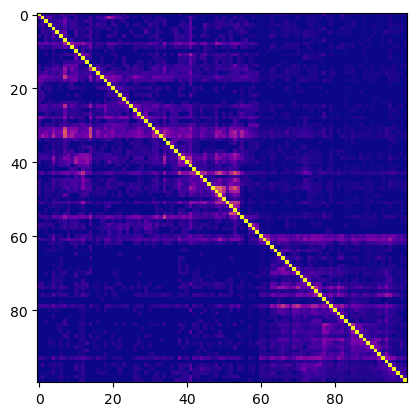

In [49]:
plt.imshow(od_matrix_np_pct[0:100, 0:100], vmin = 0, vmax = 1, cmap = 'plasma')

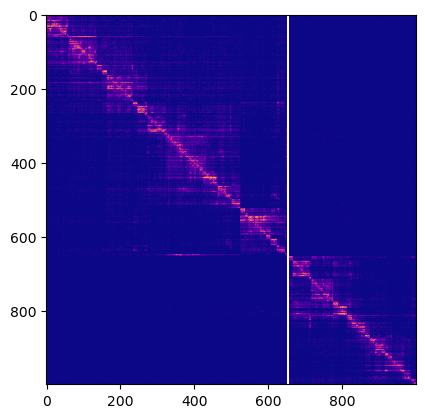

In [50]:
plt.imshow(od_matrix_np_pct_nodiag[0:1000, 0:1000], vmin = 0, vmax = 1, cmap = 'plasma')

In [35]:
np.unravel_index(np.argmax(od_matrix_np_pct_nodiag), od_matrix_np_pct_nodiag.shape)

(0, 653)

In [46]:
np.sum(od_matrix_np[:, 653])

7.0